---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Cátedra de Investigación Operativa__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

# Repaso de probabilidad

## Ejercicio distribución Normal

<img src="tomates.jpg">

Una empresa comercializa tomates cherry premium. En su línea de producción automatizada, una unidad con un pistón y una cámara conectada a un modelo de visión artificial, selecciona tomates de entre 3.3 y 3.9 cm de diámetro; valor que la compañía considera aceptable para ser considerados de esa gama.

Se sabe que la media de los tomates es de 3.5cm y el desvío 0.35 cm. Además, se sabe que el diámetro en cada batch es una variable aleatoria que sigue una distribución normal.

Una nueva oportunidad de negocio, obliga a ingeniería a dimensionar un depósito de productos seleccionados bajo las anteriores características. 

Sabemos que el próximo batch de producción incluye 153000 unidades variadas, se busca saber qué cantidad de esas unidades se almacenarán como premium. En base a ese dato, se alquilará un nuevo depósito.

Importamos el método norm de la librería Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.
Además la librería math.

In [16]:
from scipy.stats import norm
import math

Escribimos los datos:
- tot: total de productos involucrados en el stock
- xmin: límite mínimo
- xmax: límite máximo
- mean: media
- std: distribución estándar

In [17]:
tot = 153000

xmin = 3.3
xmax = 3.9
mean = 3.5
std = 0.35

Calculamos los Z-Scores como:

$Z = \frac{X - \bar{X}}{\sigma}$

Siendo $Z$ el Z-Score, $X$ el valor límite, $\bar{X}$ la media y $\sigma$ el desvío.

In [18]:
zmin = (xmin - mean) / std
zmax = (xmax - mean) / std

print(f"zscore_min: {zmin}; zscore_max: {zmax}")

zscore_min: -0.571428571428572; zscore_max: 1.1428571428571426


Usamos la *norm* de *Scipy* para calcular la probabilidad en cada límite. 

Este método llama a la acumulada de la función estándar, es decir $X \sim \mathcal{N[0, 1]}$:

In [19]:
pmin = norm.cdf(zmin)
pmax = norm.cdf(zmax)

print(f"Probabilidad min: {pmin}; Probabilidad max: {pmax}")

Probabilidad min: 0.28385458309867606; Probabilidad max: 0.8734510455264421


Restamos ambos valores obtenidos para calcular el área bajo la curva que representa la probabilidad entre los dos valores límites.

In [20]:
auc = (pmax - pmin)

print(f"Probabilidad entre {xmin} y {xmax}: {auc}")

Probabilidad entre 3.3 y 3.9: 0.5895964624277661


Multiplicamos la probabilidad obtenida por la cantidad total de producto:

In [21]:
q = math.ceil(auc * tot)

print(f"Cantidad: {q}")

Cantidad: 90209


Por lo tanto, * productos tienen que reservarse como stock de seguridad.

Gráficamente, calculamos lo siguiente:

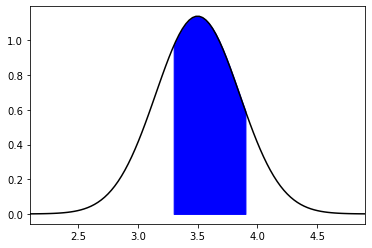

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# PDF:
x = np.linspace(mean-4*std, mean+4*std, 100)
y = norm.pdf(x,mean,std)
plt.plot(x,y, color='black')

# Fill:
ptx = np.linspace(xmin, xmax, 20)
pty = norm.pdf(ptx,mean,std)
plt.fill_between(ptx, pty, color='b', alpha=1.0)

plt.xlim([mean-4*std, mean+4*std])
plt.show()

## Ejercicio distribución de Poisson

Siguiendo con el caso anterior. En mantenimiento industrial, surge la necesidad de presupuestar mensualmente los servicios de reparación correctivos del robot seleccionador.

Particularmente nos interesa centrarnos en el pistón. Sabemos que el robot tiene una media de fallas graves de 1 cada 20 días por desajuste del pistón. Se trabaja 24 días al mes. La cantidad de fallas es una variable que sigue una distribución Poisson.

Al ocurrir por lo menos dos fallas, el servicio de mantenimiento para la línea y hace los ajustes correspondientes.

El costo de reparación es de 500 dólares.

Importamos el método poisson de la librería Scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [62]:
from scipy.stats import poisson

Datos:

In [70]:
mu = 1/20 * 24 # 1 falla/15 días x 20 días

costo = 500

mu

1.2000000000000002

Dado que es Poisson es una función de probabilidad discreta, podemos calcularlo de dos formas: 

### 1. Partiendo de la Función de Masa de Probabilidad: 

In [64]:
pmfx0 = poisson.pmf(0, mu)
pmfx1 = poisson.pmf(1, mu)

print(f"Probabilidad de que no ocurran eventos: {pmfx0},\nProbabilidad de que ocurra 1 evento: {pmfx1}")

Probabilidad de que no ocurran eventos: 0.301194211912202,
Probabilidad de que ocurra 1 evento: 0.36143305429464256


In [65]:
cdfxgeq2_a = 1 - (pmfx0 + pmfx1)

print(f"Probabilidad de tener por lo menos 2 eventos: {cdfxgeq2_a}")

Probabilidad de tener por lo menos 2 eventos: 0.33737273379315535


Graficamente podemos ver la función de masa de Probabilidad:

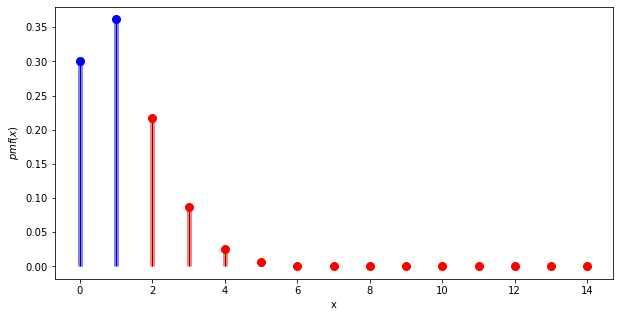

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for x, c in zip(range(15), ['b']*2 + ['r']*13):
    ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf', color=c)
    ax.vlines(x, 0, poisson.pmf(x, mu), colors='k', linestyles='-', lw=1, label='frozen pmf')
    ax.vlines(x, 0, poisson.pmf(x, mu), colors=c, lw=5, alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('$pmf(x)$')

plt.show()

### 2. Partiendo de la Función de Distribución Acumulada:

In [67]:
cdfxleq1 = poisson.cdf(1, mu)

print(f"Probabilidad de tener 0 o 1 eventos: {cdfxleq1}")

Probabilidad de tener 0 o 1 eventos: 0.6626272662068446


In [68]:
cdfxgeq2_b = 1 - cdfxleq1

print(f"Probabilidad de tener por lo menos 2 eventos: {cdfxgeq2_b}")

Probabilidad de tener por lo menos 2 eventos: 0.33737273379315535


Multiplicamos la probabilidad por el costo y obtenemos el presupuesto estimado:

In [69]:
print(f"Presupuesto de mantenimiento correctivo: {cdfxgeq2_b * costo:.2f} usd")

Presupuesto de mantenimiento correctivo: 168.69 usd
